<a href="https://colab.research.google.com/github/akiabe/udemy_PyTorch_DNN/blob/master/pytorch_regression_Moore's_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [38]:
df = pd.read_csv("moore.csv", header=None)
df.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [39]:
data = df.values
print(type(data))

<class 'numpy.ndarray'>


In [40]:
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)
print(X.shape)
print(Y.shape)

(162, 1)
(162, 1)


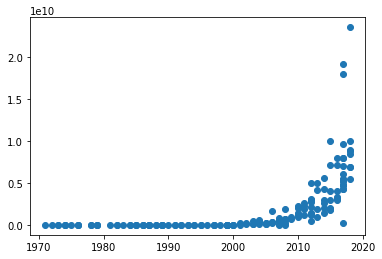

In [41]:
plt.scatter(X, Y);

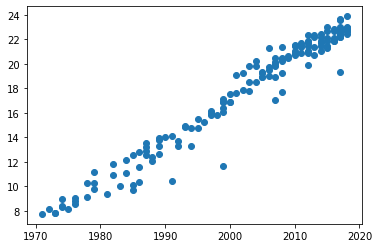

In [42]:
# take Y log scale
Y = np.log(Y)
plt.scatter(X, Y);

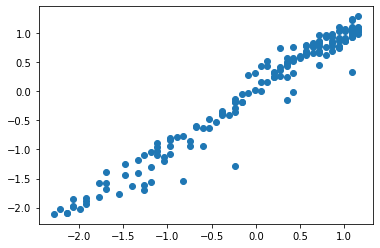

In [43]:
# normalization
X_mean = X.mean()
X_std = X.std()
Y_mean = Y.mean()
Y_std = Y.std()

X = (X - X_mean) / X_std
Y = (Y - Y_mean) / Y_std

plt.scatter(X, Y);

In [44]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [45]:
model = nn.Linear(1, 1)

In [46]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [47]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)
print(type(inputs))
print(type(targets))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [48]:
n_epochs = 100
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item())

  loss.backward()
  optimizer.step()

  print(f"Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 3.1732
Epoch 2/100, Loss: 3.0490
Epoch 3/100, Loss: 2.8461
Epoch 4/100, Loss: 2.5999
Epoch 5/100, Loss: 2.3362
Epoch 6/100, Loss: 2.0728
Epoch 7/100, Loss: 1.8209
Epoch 8/100, Loss: 1.5873
Epoch 9/100, Loss: 1.3754
Epoch 10/100, Loss: 1.1862
Epoch 11/100, Loss: 1.0195
Epoch 12/100, Loss: 0.8740
Epoch 13/100, Loss: 0.7479
Epoch 14/100, Loss: 0.6394
Epoch 15/100, Loss: 0.5465
Epoch 16/100, Loss: 0.4672
Epoch 17/100, Loss: 0.3998
Epoch 18/100, Loss: 0.3426
Epoch 19/100, Loss: 0.2942
Epoch 20/100, Loss: 0.2534
Epoch 21/100, Loss: 0.2189
Epoch 22/100, Loss: 0.1899
Epoch 23/100, Loss: 0.1655
Epoch 24/100, Loss: 0.1450
Epoch 25/100, Loss: 0.1278
Epoch 26/100, Loss: 0.1133
Epoch 27/100, Loss: 0.1012
Epoch 28/100, Loss: 0.0910
Epoch 29/100, Loss: 0.0825
Epoch 30/100, Loss: 0.0753
Epoch 31/100, Loss: 0.0693
Epoch 32/100, Loss: 0.0643
Epoch 33/100, Loss: 0.0601
Epoch 34/100, Loss: 0.0566
Epoch 35/100, Loss: 0.0536
Epoch 36/100, Loss: 0.0512
Epoch 37/100, Loss: 0.0491
Epoch 38/1

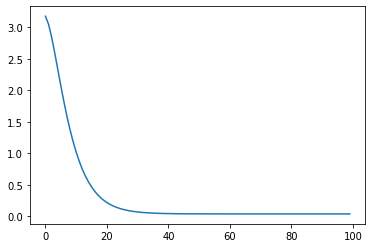

In [49]:
plt.plot(losses);

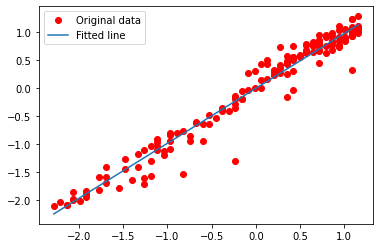

In [50]:
preds = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, "ro", label="Original data")
plt.plot(X, preds, label="Fitted line")
plt.legend()
plt.show()

In [54]:
# y = wx + b
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.9802294]] [5.5006596e-05]


In [55]:
a = w[0, 0] * (Y_std / X_std)
print(a)

0.34156340536119756
